## Зенгер ИУ5-24М Вариант 5

https://www.kaggle.com/iabhishekofficial/mobile-price-classification

### Задача 1 - №5

Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "one-hot encoding".

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
# This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).
data['price_range'].unique()

array([1, 2, 3, 0])

#### sklearn

In [7]:
ohe = OneHotEncoder()
price_ohe = ohe.fit_transform(data[['price_range']])

In [18]:
data['price_range'].head(10)

0    1
1    2
2    2
3    2
4    1
5    1
6    3
7    0
8    0
9    0
Name: price_range, dtype: int64

In [16]:
price_ohe.todense()[0:10]

matrix([[0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]])

#### pandas

In [20]:
pd.get_dummies(data['price_range']).head(10)

,0,1,2,3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
5,0,1,0,0
6,0,0,0,1
7,1,0,0,0
8,1,0,0,0
9,1,0,0,0


### Задача 2 - №25

Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе межквартильного размаха.

https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [67]:
data = pd.read_csv('heart.csv')

In [68]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [69]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

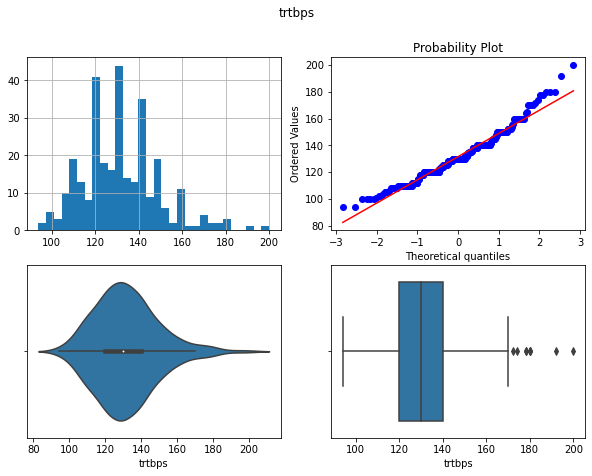

In [70]:
diagnostic_plots(data, 'trtbps', 'trtbps')

In [71]:
def get_outlier_boundaries(df, col):
    K = 1.5
    quant_75 = df[col].quantile(0.75)
    quant_25 = df[col].quantile(0.25)
    IQR = quant_75 - quant_25
    print('quantile 0.75: ', quant_75)
    print('quantile 0.25: ', quant_25)
    print('IQR: ', IQR)
    lower_boundary = quant_25 - (K * IQR)
    upper_boundary = quant_75 + (K * IQR)
    return lower_boundary, upper_boundary    

In [72]:
get_outlier_boundaries(data, 'trtbps')

quantile 0.75:  140.0
quantile 0.25:  120.0
IQR:  20.0


(90.0, 170.0)

quantile 0.75:  140.0
quantile 0.25:  120.0
IQR:  20.0


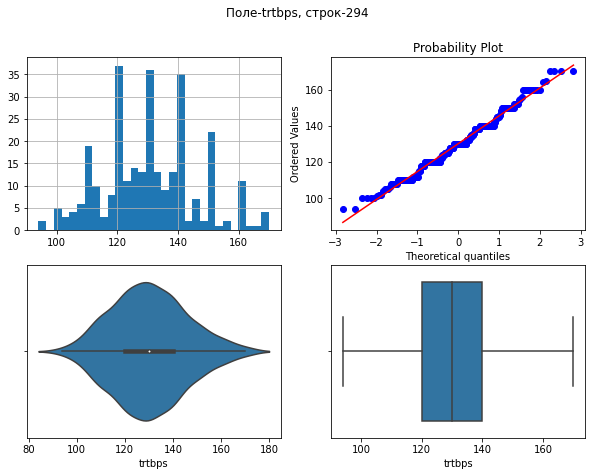

In [74]:
# Удаление выбросов
lower_boundary, upper_boundary = get_outlier_boundaries(data, 'trtbps')
# Флаги для удаления выбросов
outliers_temp = np.where(data['trtbps'] > upper_boundary, True, 
                         np.where(data['trtbps'] < lower_boundary, True, False))
# Удаление данных на основе флага
data_trimmed = data.loc[~(outliers_temp), ]  
title = 'Поле-{}, строк-{}'.format('trtbps', data_trimmed.shape[0])
diagnostic_plots(data_trimmed, 'trtbps', title)